In [41]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict , Literal
from langchain.prompts import PromptTemplate


In [42]:
class QuadState(TypedDict):
    a:int
    b:int
    c:int

    equation:str
    discriment:float
    result:str

In [58]:
def show_equation(state:QuadState):
    equation = f'{state['a']}x2+{state['b']}x{state['c']}'
    return{'equation':equation}

In [44]:
def calculate_discriment(state:QuadState):
    discriment= state['b']**2 - 4*state['a']*state['c']
    return {'discriment':discriment}

In [45]:
#roots


def real_root(state:QuadState):
    root1 = (-state['b']+ state["discriment"]**0.5)/(2*state['a'])
    root2 = (state['b']+ state["discriment"]**0.5)/(2*state['a'])
    result = f'Roots are {root1} & {root2}'
    return{"result":result}

def repeated_roots(state:QuadState):
    root = (-state['b'])/(2*state['a'])
    result = f'Only Repeating Roots is {root}'
    return{"result":result}


def no_real_roots(state:QuadState):
    result = f'No real Roots'
    return { 'result':result}

In [46]:
# Check CONDITIONS

def check_conditions(state:QuadState)->Literal['real_root','repeated_roots','no_real_roots']:
    if state['discriment'] > 0:
        return "real_root"
    elif state['discriment'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [47]:
graph = StateGraph(QuadState)

# add node

graph.add_node("show_equation",show_equation)
graph.add_node("calculate_discriment",calculate_discriment)
graph.add_node("real_root",real_root)
graph.add_node("repeated_roots",repeated_roots)
graph.add_node("no_real_roots",no_real_roots)

#add edges

graph.add_edge(START,"show_equation")
graph.add_edge("show_equation","calculate_discriment")

#conditional Edges

graph.add_conditional_edges("calculate_discriment",check_conditions)



graph.add_edge("real_root",END)
graph.add_edge("repeated_roots",END)
graph.add_edge("no_real_roots",END)


graph.add_edge("calculate_discriment",END)

workflow = graph.compile()

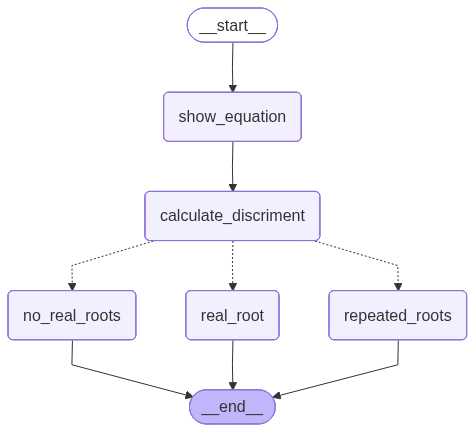

In [48]:
workflow

In [62]:
initial_state={
    'a':1,
    'b':2,
    'c':4
}

result = workflow.invoke(initial_state)


In [63]:
result

{'a': 1,
 'b': 2,
 'c': 4,
 'equation': '1x22x4',
 'discriment': -12,
 'result': 'No real Roots'}